## Word Embeddings

In NLP, word embeddings is a term used for representation of words for text analysis, typically in the form of a real-valued vector that encodes the meaning of the word such that the words that are closer in the vector space are expected to be similar in meaning. All the techniques such as 
- TfIdf,
- Bag of Words,
- N-grams,
- Word2vec, etc.
are Word Embedding techniques. These techniques convert words into vector so that machines can understand this and we can apply algorithms

#### Types of Word Embedding (2 Types)
1. Frequency Based (Bag of Words, TfIdf, Glove (Matrix Factorization))
2. Prediction based: The conversion of words into vector is based on some algorithm (generally deep learning based algos) (Ex: word2vec)

# Word2vec
### What is word2vec?
It is a Word Embedding technique whose job is to convert a given word to vector (collection of numbers). 

### How word2vec differs from TfIdf, Bag of Words, etc?
- In word2vec we can get semantic meaning of words, like Happy and Joy are similar, which was missing in TfIdf, Bag of Words, etc.
- In TfIdf, Bag of Words, etc, when we converted text into vectors, we got very high dimensional vectors. But in word2vec, the dimension is generally around 100-300, which is very low and hence increases computational speed
- Vector created in word2vec are dense as opposed to sparse vectors craeted by TfIdf, Bag of Words, etc. This helps in countering problems like overfitting.

------------------------------------------------------------------------
There are 2 ways of working with word2vec. Either we can use
1. pre trained model and use on our dataset
2. train our model on our dataset and then use it

--------------------------------------------------------------------------
### Pre-Trained
We will use the pre-trained weights of word2vec that was trained on Google News website corpus containing 3 billion words. The model consists of 300-dimentional vectors for 3 million words and phrases.

In [13]:
# !pip install wget
# !pip install gensim

import gensim
from gensim.models import Word2Vec, KeyedVectors

In [14]:
'''
gdrive link: https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?resourcekey=0-wjGZdNAUop6WykTtMip30g
github link: https://github.com/mmihaltz/word2vec-GoogleNews-vectors
'''

model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz',binary=True,limit=500000)

In [15]:
# checking the representation of some random words ---> combination of 300 numbers
model['man']

model['man'].shape
# try for different words

(300,)

In [17]:
# most similar words --> 
'''
Step 1: gensim library will convert the word to vector V1
Step 2: it will try to find most similar vectors to V1 (by using cosine similarity)
'''
model.most_similar('man')


[('woman', 0.7664012908935547),
 ('boy', 0.6824871301651001),
 ('teenager', 0.6586930155754089),
 ('teenage_girl', 0.6147903203964233),
 ('girl', 0.5921714305877686),
 ('robber', 0.5585119128227234),
 ('Robbery_suspect', 0.5584409832954407),
 ('teen_ager', 0.5549196600914001),
 ('men', 0.5489763021469116),
 ('guy', 0.5420035123825073)]

In [18]:
model.most_similar('cricket')

[('cricketing', 0.8372225761413574),
 ('cricketers', 0.8165745735168457),
 ('Test_cricket', 0.8094819188117981),
 ('Twenty##_cricket', 0.8068488240242004),
 ('Twenty##', 0.7624265551567078),
 ('Cricket', 0.75413978099823),
 ('cricketer', 0.7372578382492065),
 ('twenty##', 0.7316356897354126),
 ('T##_cricket', 0.7304614186286926),
 ('West_Indies_cricket', 0.6987985968589783)]

In [19]:
model.most_similar('facebook')

[('Facebook', 0.7563533186912537),
 ('FaceBook', 0.7076998949050903),
 ('twitter', 0.6988552212715149),
 ('myspace', 0.6941817998886108),
 ('Twitter', 0.664244532585144),
 ('Facebook.com', 0.6529868245124817),
 ('FacebookFacebook', 0.6162722110748291),
 ('facebook.com', 0.6135972142219543),
 ('Twitter.com', 0.6102108359336853),
 ('TwitterTwitter', 0.6085205674171448)]

In [20]:
# Function to calculate cosine similarity between two give words by first converting it into vectors
model.similarity('man', 'woman')

0.76640123

In [21]:
model.similarity('man', 'python')

0.2097966

In [22]:
# Filtering the odd one out from a given array of words based on cosine similarity
model.doesnt_match(['PHP', 'Python', 'man'])

'man'

In [23]:
vec = model['king'] - model['man'] + model['woman']
model.most_similar([vec])

[('king', 0.8449392318725586),
 ('queen', 0.7300517559051514),
 ('monarch', 0.645466148853302),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676352500916),
 ('prince', 0.5777117609977722),
 ('kings', 0.5613663792610168),
 ('sultan', 0.5376775860786438),
 ('queens', 0.5289887189865112),
 ('ruler', 0.5247419476509094)]

In [24]:
vec = model['INR'] - model ['India'] + model['England']
model.most_similar([vec])

[('INR', 0.6442341208457947),
 ('GBP', 0.5040826797485352),
 ('England', 0.44649264216423035),
 ('£', 0.43340998888015747),
 ('Â_£', 0.4307197630405426),
 ('£_#.##m', 0.42561301589012146),
 ('Pounds_Sterling', 0.42512619495391846),
 ('GBP##', 0.42464491724967957),
 ('stg', 0.42324796319007874),
 ('£_#.###m', 0.4201711118221283)]

# Intution fpr word2vec
Here we try to find the semantic meaning between words

1. word2vec creates features depending on vocabulory.
2. Then values are assigned to each feature

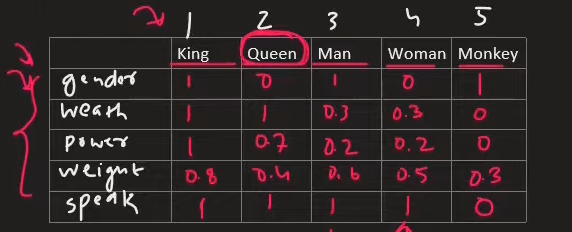

---------------------------------------------------------------
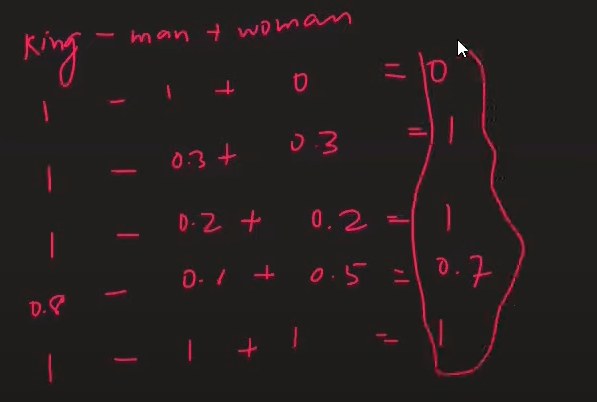
This vector comes very close to Queen 

-----------------------------------------------------------------
In read world, we have vocabulory in millions. So, it would be very difficult to craete such features for them manually. Hence here Neural Networks are used to create these features automatically.
- The downside of using this Neural Networks is that we will never know what features are created. Like in above pic, we can clearly see we have created features like Gender, Wealth, Weight, etc. But when we use Neural Networks we will never know these features. 
- We will only know the values of these features but not what these features are.

------------------------------------------------------------------
##### Color encoding of first 50 words for some of the words
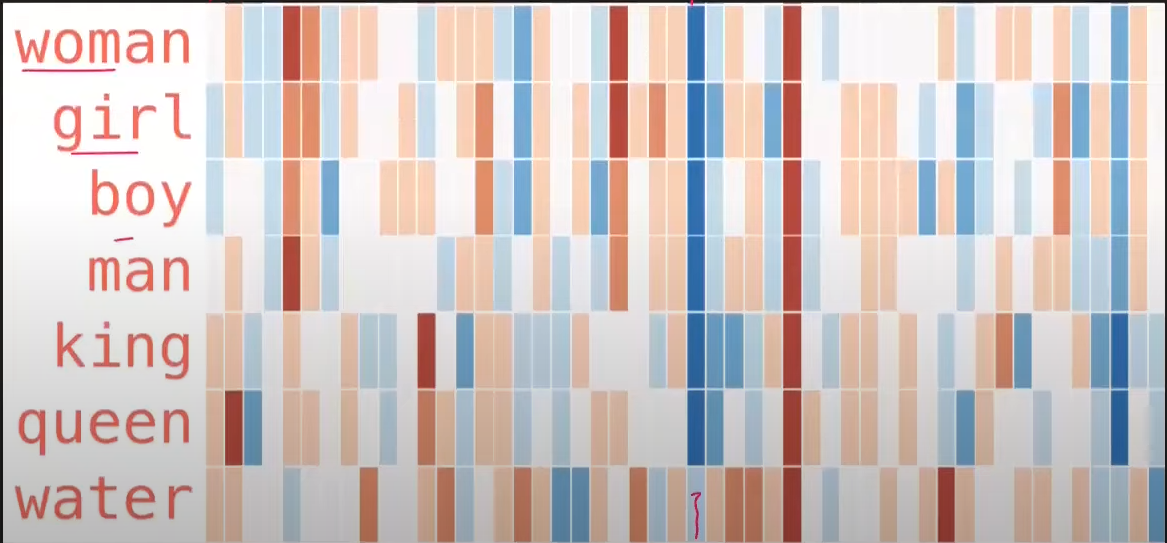
By analysing the features, we can see some similarities/ patterns in features. Using this we can get a rough idea on what these features convey.

----------------------------------------------------------------------
### Core logic of word2vec
The underlying assumption of Word2Vec is that two words sharing similar contexts also share a similar meaning and consequently a similar vector representation.

Ex:
1. The Football player kicked the ball.
2. The Hockey player kicket the ball.

Here word2vec will try to see the context for hockey and football and see that they have been used in same context. Hence it will create vectors such that they are similar.


---------------------------------------------------------------------------
## Types of Word2Vec (2)
1. CBOW
2. Skip-gram

Both are shallow Neural Networks and have architectural differences

## CBOW (Continuous Bag of Words) and Skip-Gram
We cannot directly convect any word to vector. So, we take a fake problem and we try to solve this fake problem. In the process of solving this dummy problem, we get the vector as by product.

The Architecture of CBOW is just reverse of Skip-gram. Check video for more clarity (https://www.youtube.com/watch?v=DDfLc5AHoJI&list=PLKnIA16_RmvZo7fp5kkIth6nRTeQQsjfX&index=7)

It is proven is research that, 
- while working with small data, select CBOW as it is slightly faster and accurate results on small data
- while working with big data, Skip-gram gives better result

---------------------------------------------------------

To increase the quality of word2vec
- increase training data
- increase the dimension of vectors
- increase window size, but this results ion some problem in training and time required also increases

### Training on Game of Thrones Data
Dataset Link - https://www.kaggle.com/datasets/khulasasndh/game-of-thrones-books?resource=download&select=001ssb.txt

In [25]:
import numpy as np
import pandas as pd

import gensim
import os

In [27]:
# Fetching all the files in data folder
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

story = []

for filename in os.listdir(path='Dataset/game_of_thrones_books/'):
    f = open(os.path.join('Dataset/game_of_thrones_books/', filename))
    corpus = f.read()
    raw_sent = sent_tokenize(corpus)  # sentence tokenization
    for sent in raw_sent:
        story.append(simple_preprocess(sent))   # tokenize each sentence 

# Remove stop words also

In [32]:
len(story)

145020

In [34]:
# All the sentences are stored in story for all the 5 books
story[4]

['gared', 'did', 'not', 'rise', 'to', 'the', 'bait']

In [35]:
# Creating Model
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    vector_size=100
)

'''
window --> while training, how many words to be considered while craeting the problem statement
min_count --> consider sentences for training with atleast min_count words

'''

'\nwindow --> while training, how many words to be considered while craeting the problem statement\nmin_count --> consider sentences for training with atleast min_count words\n\n'

In [36]:
# creating vocabulary 
model.build_vocab(story)

In [38]:
# Train deep learning model

model.train(
    story,
    total_examples=model.corpus_count,
    epochs=model.epochs
)

'''
epochs --> by default value is 5
'''

'\nepochs --> by default value is 5\n'

In [39]:
 # Now we have trained out model. We will access it using below code

model.wv.most_similar('daenerys')

[('stormborn', 0.7348188757896423),
 ('targaryen', 0.6933521628379822),
 ('unburnt', 0.6274828314781189),
 ('viserys', 0.6232149600982666),
 ('myrcella', 0.6047780513763428),
 ('dragons', 0.5811744928359985),
 ('aegon', 0.5785123109817505),
 ('queen', 0.5744041800498962),
 ('khaleesi', 0.5724629759788513),
 ('princess', 0.5703769326210022)]

In [40]:
model.wv.doesnt_match(['jon', 'rikon', 'arya', 'sansa', 'bran'])

# Jon was adopted while others were not

'jon'

In [41]:
model.wv.doesnt_match(['cersi', 'jaime', 'bronn', 'tyrion'])

'bronn'

In [42]:
# Getting the vector representation
model.wv['king']

array([-0.7007244 , -0.4736177 ,  1.7318978 ,  0.64350504, -2.668464  ,
       -1.4847605 ,  1.0479118 , -1.7778324 , -1.6277012 , -0.6031184 ,
       -0.3979485 ,  0.24691501, -0.01364311,  2.236255  , -3.193732  ,
       -0.25677398, -0.32763332,  2.1101878 , -0.82105064,  0.81101924,
        0.66572833,  0.4489853 ,  0.8781041 , -3.4109745 , -2.5306742 ,
        2.763618  , -1.6021585 , -1.2289264 ,  0.87975633,  0.34496784,
       -1.869172  ,  0.40348968,  0.40229532,  0.23913392,  3.5819259 ,
       -2.966181  , -1.0515655 , -1.9874438 ,  3.059258  , -2.1151903 ,
       -0.07081157,  2.4686105 ,  3.454461  ,  0.27046156, -0.35058936,
       -1.4068382 ,  1.3064119 , -1.7622862 ,  3.481091  , -4.551384  ,
       -4.201735  , -1.7227738 , -0.6984813 , -3.4169347 ,  2.3196135 ,
       -0.6677014 ,  0.4813101 , -0.10896008,  1.5884982 ,  3.2674074 ,
        0.3649055 ,  0.07750839,  0.82243115,  3.0757115 ,  2.4229517 ,
        0.8034782 ,  0.89511186, -3.1604958 ,  0.15360153, -2.23

In [43]:
model.wv.similarity('arya', 'sansa')

0.76819533

In [44]:
model.wv.similarity('cersei', 'sansa')

0.6502957

In [45]:
model.wv.similarity('tywin', 'sansa')

0.20030273

In [46]:
# function to get the vector representations of all the words
model.wv.get_normed_vectors()

array([[-0.05289658, -0.08100738,  0.16128547, ..., -0.0685404 ,
        -0.06502858,  0.13442835],
       [-0.09334907, -0.14297369,  0.16101778, ..., -0.01894446,
        -0.09762994,  0.05659072],
       [ 0.03281889, -0.16208732, -0.12446398, ...,  0.02948715,
         0.16444188, -0.03478928],
       ...,
       [-0.01018166,  0.11415709,  0.02504247, ..., -0.11317457,
         0.08494326, -0.05451791],
       [-0.08918697,  0.13701889,  0.14645009, ...,  0.02024161,
         0.11715434, -0.03322335],
       [-0.07095575,  0.04424271,  0.06674369, ...,  0.01311046,
         0.11018876, -0.02317068]], dtype=float32)

In [47]:
model.wv.get_normed_vectors().shape

# unique words = 17453, which are having vector representations

(17453, 100)

In [50]:
# to get the word corresponding to vecto
y = model.wv.index_to_key
len(y)

17453

In [51]:
# Reducing dimension of Vector from 100 to 3 for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

X = pca.fit_transform(model.wv.get_normed_vectors())

In [53]:
X.shape

(17453, 3)

In [56]:
# Plotting 1st 100 words

import plotly.express as px
fig = px.scatter_3d(
    X[200:300],
    x=0,
    y=1,
    z=2,
    color=y[200:300]
)
fig.show()

### Assingment

Apply word2vec on different datasets